In [4]:
from init import *


# Setting: D1, Laser resonant to F=2 $\rightarrow$ F'=2, $\sigma_+$


In [5]:
hamil = laser_sigma_plus_F2_FP2_D1(OFF_RESONANT_SATURATION_INTENSITY_D1_PI_POL)
# offset = hamil.diag()[5]
# hamil = hamil.full()
# for k in range(16):
#     hamil[k, k] -= offset
# hamil = Qobj(hamil)
rabi_D1_vector_component(E_0_plus(OFF_RESONANT_SATURATION_INTENSITY_D1_PI_POL))/(1e6*2*pi)

7.042414796845026

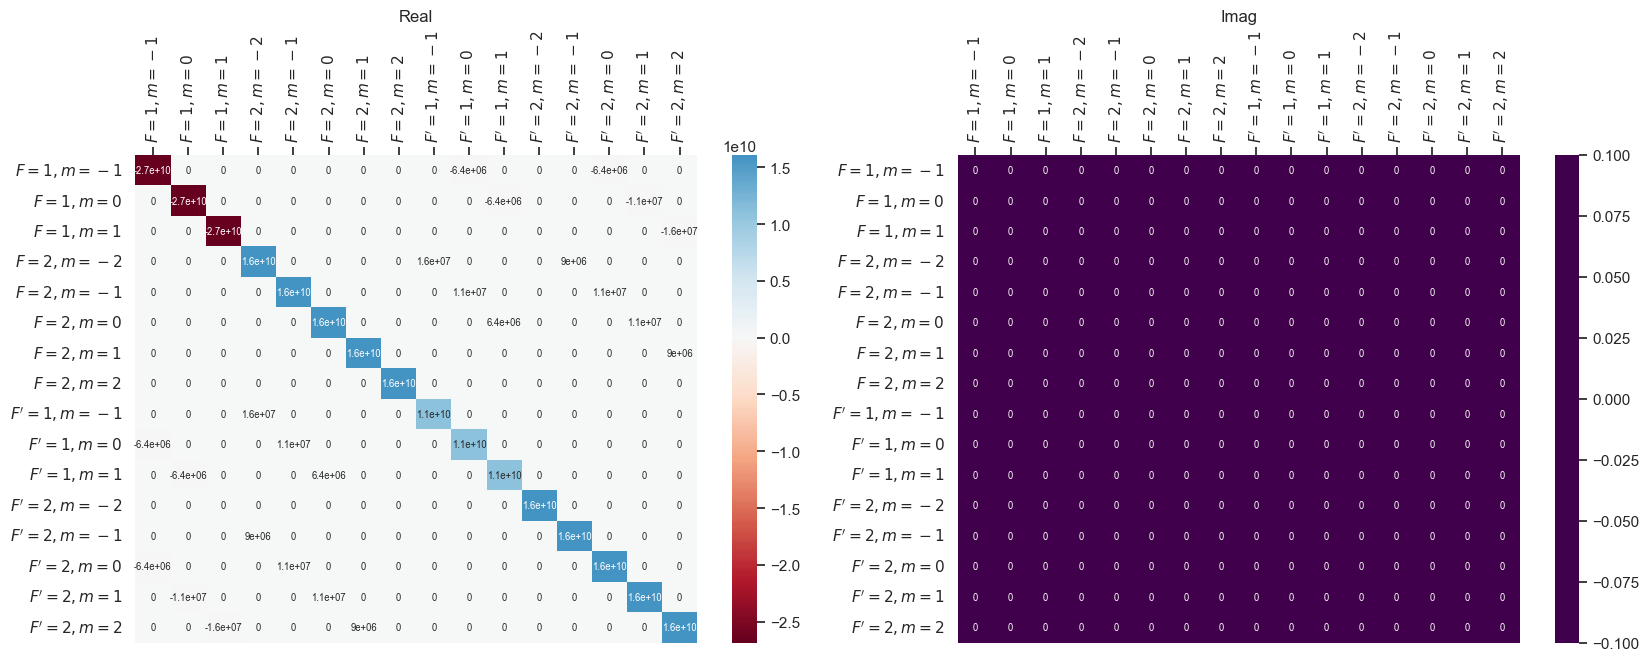

In [6]:
fig, ax = maplot(hamil, annot=True)

# Radiative Decay

## Jump operators Plot

(<Figure size 2000x1000 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

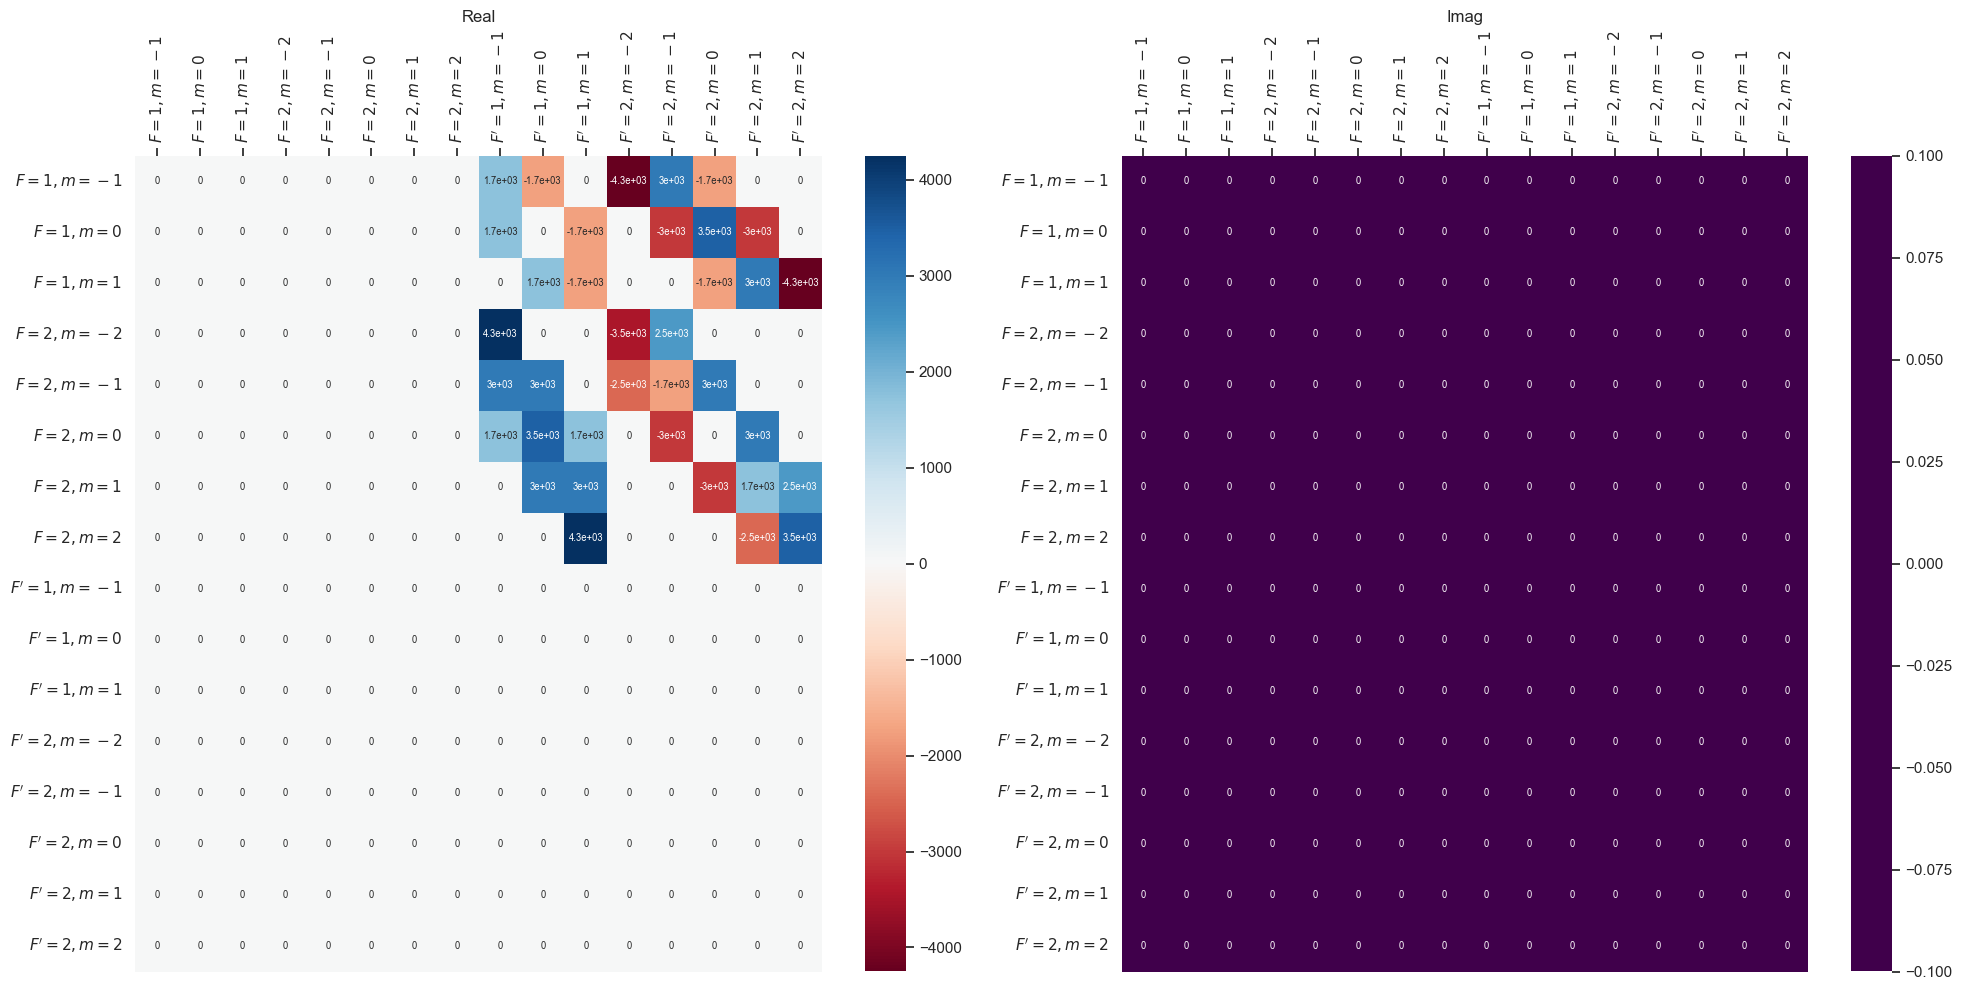

In [4]:
maplot(sum(natural_decay_ops_D1()), annot=True, figsize=(20, 10))

## Steady State

In [5]:
L = liouvillian(hamil, c_ops=natural_decay_ops_D1())

(<Figure size 1680x672 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

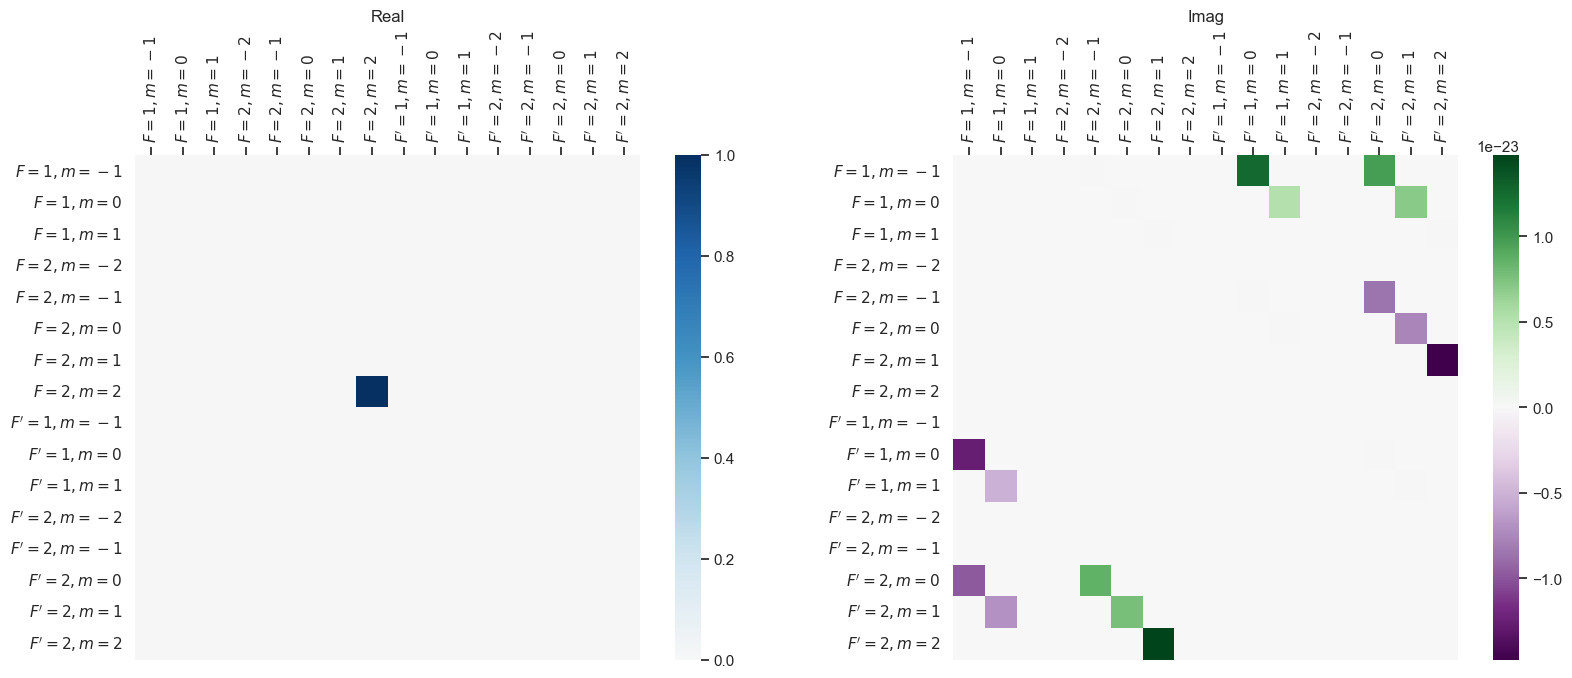

In [6]:
rho_ss = steadystate(L)
maplot(rho_ss)


## Time Evo

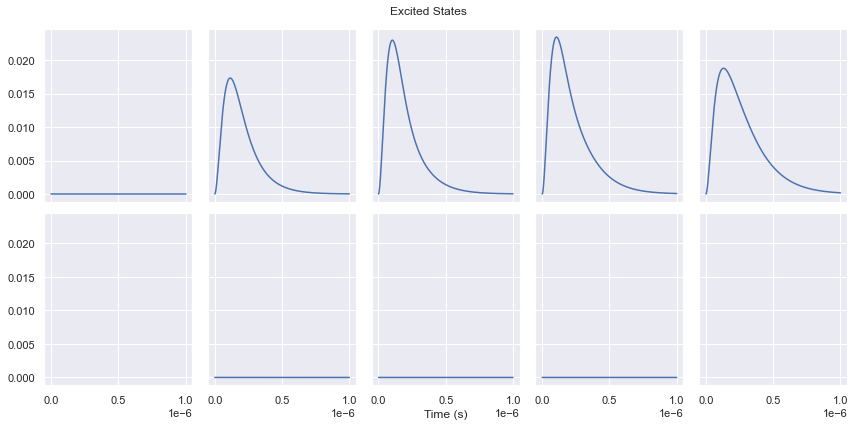

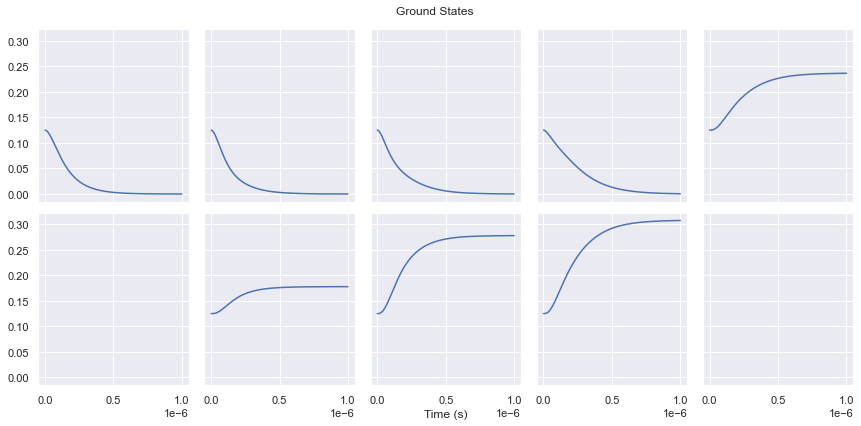

In [7]:
res_r = mesolve(
    L,
    rho0=get_equally_ground_state_D1(),
    tlist=np.linspace(0, 1e-6, 1000),
    options=Options(nsteps=10000),
)
_, axe = plot_excited_states_time(res_r)
_, axg = plot_ground_states_time(res_r)

# Quenching

(<Figure size 1680x672 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

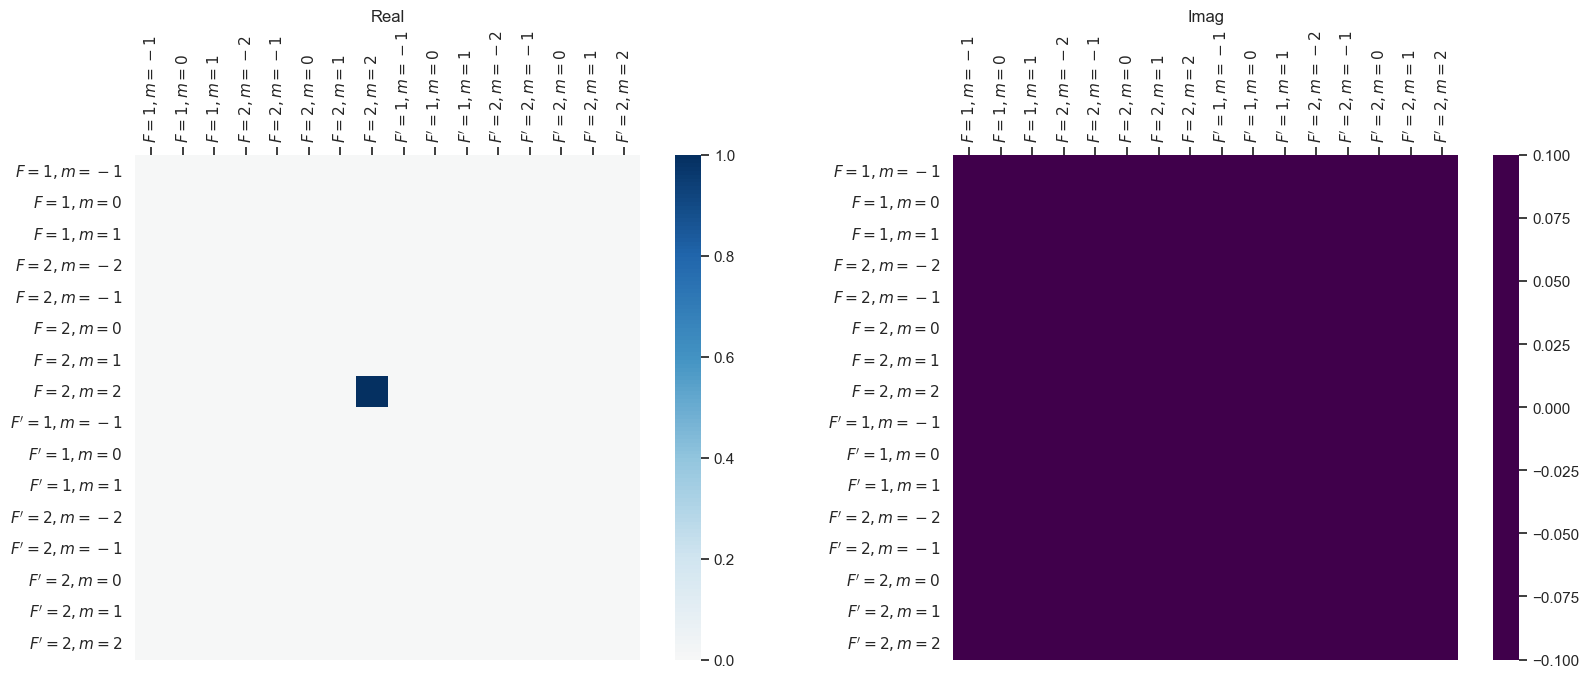

In [7]:
L = liouvillian(hamil, c_ops=quenching_ops("D1"))
rho_ss = steadystate(L)
maplot(rho_ss)

(<Figure size 864x432 with 10 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:xlabel='Time (s)'>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

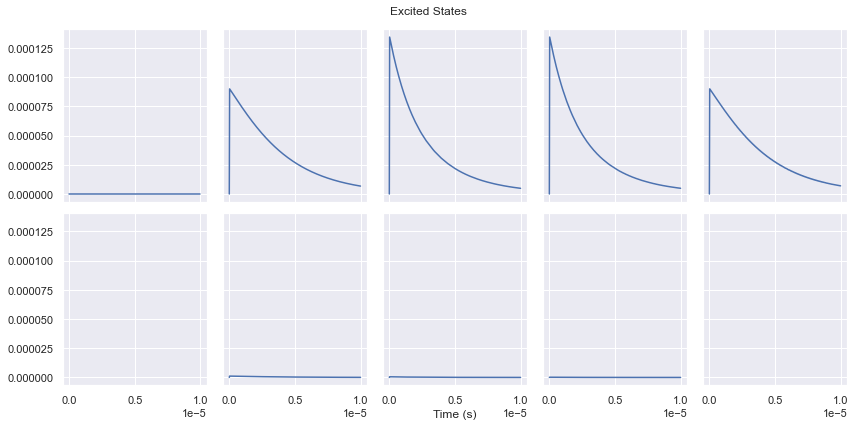

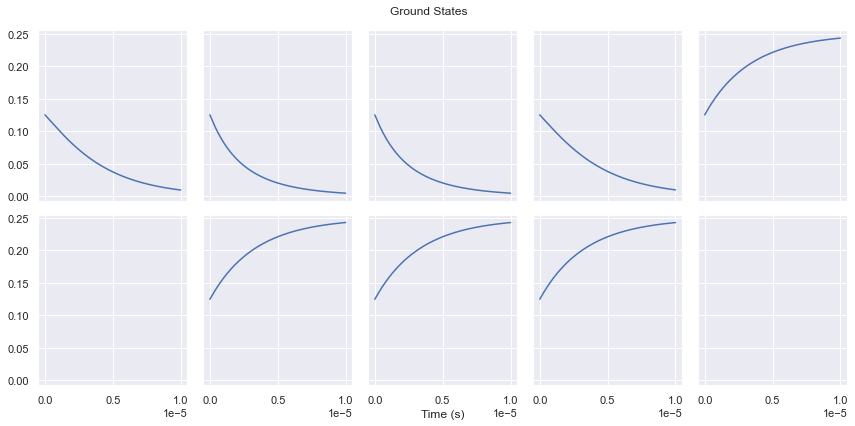

In [8]:
res_q = mesolve(
    L,
    rho0=get_equally_ground_state_D1(),
    tlist=np.linspace(0, 1e-5, 400),
    options=Options(nsteps=8000),
)
plot_excited_states_time(res_q)
plot_ground_states_time(res_q)

# ground state decay

## no drive, intra F decay

(<Figure size 864x432 with 10 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:xlabel='Time (s)'>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

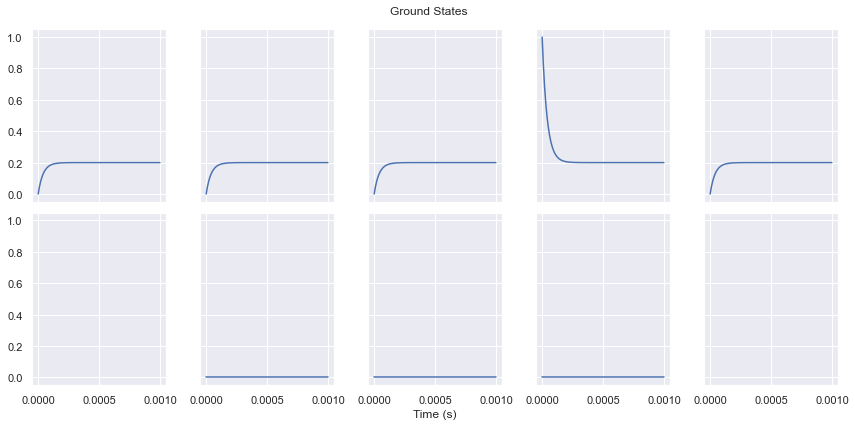

In [10]:
L = liouvillian(
    None,
    c_ops=intra_F_ground_decay("D1"),
)

res_g = mesolve(
    L,
    rho0=get_ket_Fg_D1(2, 1).proj(),
    tlist=np.linspace(0, 1e-3, 400),
    options=Options(nsteps=5000),
)
plot_ground_states_time(res_g)


## F=2 to F=1

(<Figure size 864x432 with 10 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:xlabel='Time (s)'>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

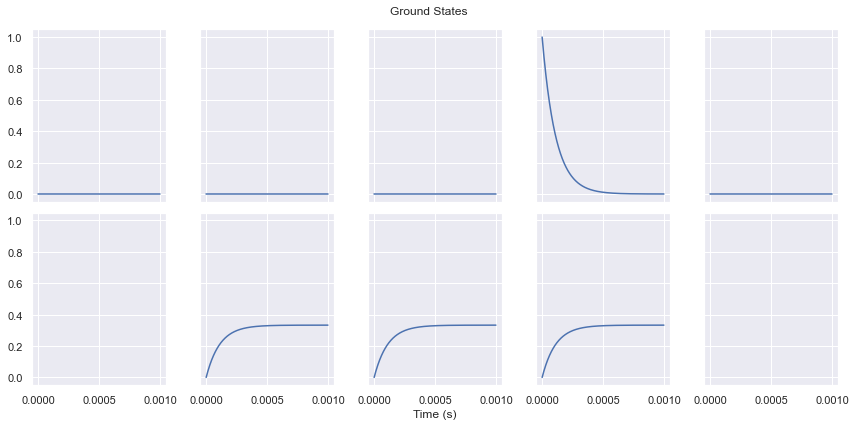

In [11]:
L = liouvillian(
    None,
    c_ops=F2_to_F1_ground_state_decay("D1"),
)
res_wall = mesolve(
    L,
    rho0=get_ket_Fg_D1(2, 1).proj(),
    tlist=np.linspace(0, 1e-3, 400),
    options=Options(nsteps=5000),
)
plot_ground_states_time(res_wall)


## F=1 to F=2

(<Figure size 864x432 with 10 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:xlabel='Time (s)'>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

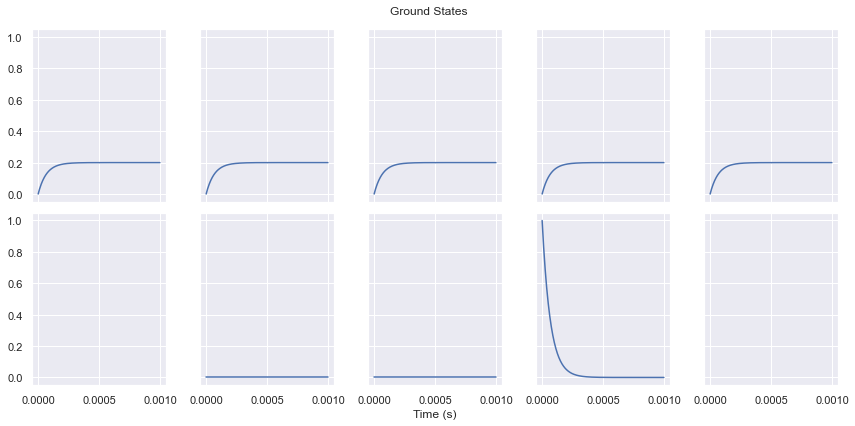

In [12]:
from init import *
L = liouvillian(
    None,
    c_ops=F1_to_F2_ground_state_decay("D1"),
)
res_wall = mesolve(
    L,
    rho0=get_ket_Fg_D1(1, 1).proj(),
    tlist=np.linspace(0, 1e-3, 400),
    options=Options(nsteps=5000),
)
plot_ground_states_time(res_wall)


## combined


(<Figure size 864x432 with 10 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:xlabel='Time (s)'>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

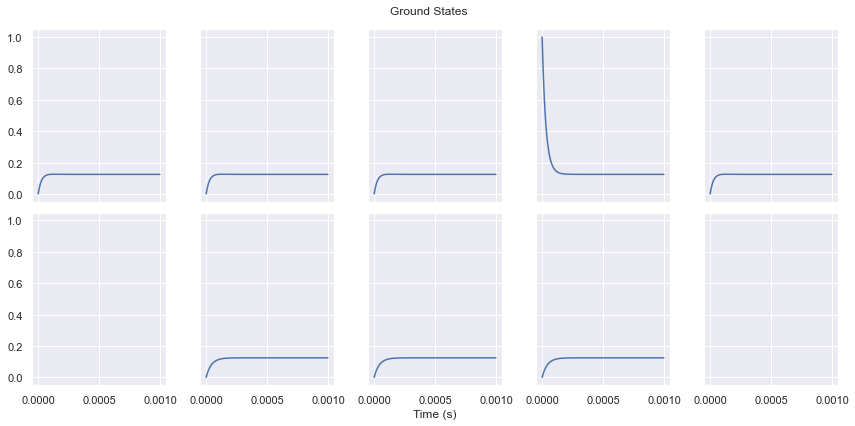

In [13]:
from init import *
L = liouvillian(
    None,
    c_ops=F1_to_F2_ground_state_decay("D1")+F2_to_F1_ground_state_decay("D1")+intra_F_ground_decay("D1"),
)
res_comb = mesolve(
    L,
    rho0=get_ket_Fg_D1(2, 1).proj(),
    tlist=np.linspace(0, 1e-3, 400),
    options=Options(nsteps=5000),
)
plot_ground_states_time(res_comb)


## alternative: collaps operators acting on electron spin alone

In [14]:
f_ground_states_uncoupled()[1]

[Quantum object: dims = [[4, 2], [1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[ 0.       ]
  [ 0.       ]
  [ 0.       ]
  [ 0.       ]
  [ 0.       ]
  [ 0.5      ]
  [-0.8660254]
  [ 0.       ]],
 Quantum object: dims = [[4, 2], [1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [-0.70710678]
  [ 0.70710678]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]],
 Quantum object: dims = [[4, 2], [1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[ 0.       ]
  [ 0.8660254]
  [-0.5      ]
  [ 0.       ]
  [ 0.       ]
  [ 0.       ]
  [ 0.       ]
  [ 0.       ]],
 Quantum object: dims = [[4, 2], [1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]],
 Quantum object: dims = [[4, 2], [1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.       ]
  [0.       ]
  [0.       ]
  [0.       ]
  [0.       ]
  [0.8660254]
  [0.5      ]
  [0.       ]],
 Quantum object: dims = [[4, 2], [1, 1]], sh

In [15]:
c_ops_ground = []
sts = f_ground_states_uncoupled()
for sigma_k in jmat(1/2):
    c = tensor(identity(4), sigma_k).transform(sts[1])
    c.dims = [[8], [8]]
    tmp = np.zeros(shape=(16,16), dtype=np.cdouble)
    tmp[:8,:8] = c
    c_ops_ground.append((2e3)**(1/2)*Qobj(tmp))

In [16]:
sigma_k

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.5  0. ]
 [ 0.  -0.5]]

In [17]:
c_ops_ground

[Quantum object: dims = [[16], [16]], shape = (16, 16), type = oper, isherm = True
 Qobj data =
 [[  0.           7.90569415   0.         -19.36491673   0.
     7.90569415   0.           0.           0.           0.
     0.           0.           0.           0.           0.
     0.        ]
  [  7.90569415   0.           7.90569415   0.          13.69306393
     0.         -13.69306394   0.           0.           0.
     0.           0.           0.           0.           0.
     0.        ]
  [  0.           7.90569415   0.           0.           0.
    -7.90569415   0.          19.36491673   0.           0.
     0.           0.           0.           0.           0.
     0.        ]
  [-19.36491673   0.           0.           0.          11.18033989
     0.           0.           0.           0.           0.
     0.           0.           0.           0.           0.
     0.        ]
  [  0.          13.69306393   0.          11.18033989   0.
    13.69306394   0.           0.       

(<Figure size 864x432 with 10 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:xlabel='Time (s)'>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

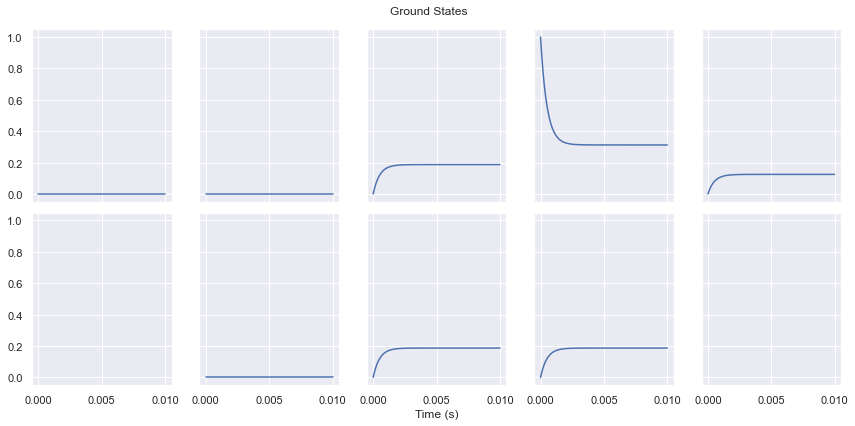

In [18]:
L = liouvillian(
    None,
    c_ops=c_ops_ground
)
res_spin = mesolve(
    L,
    rho0=get_ket_Fg_D1(2, 1).proj(),
    tlist=np.linspace(0, 1e-2, 400),
    options=Options(nsteps=5000),
)
plot_ground_states_time(res_spin)

## difference 

(<Figure size 1680x672 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

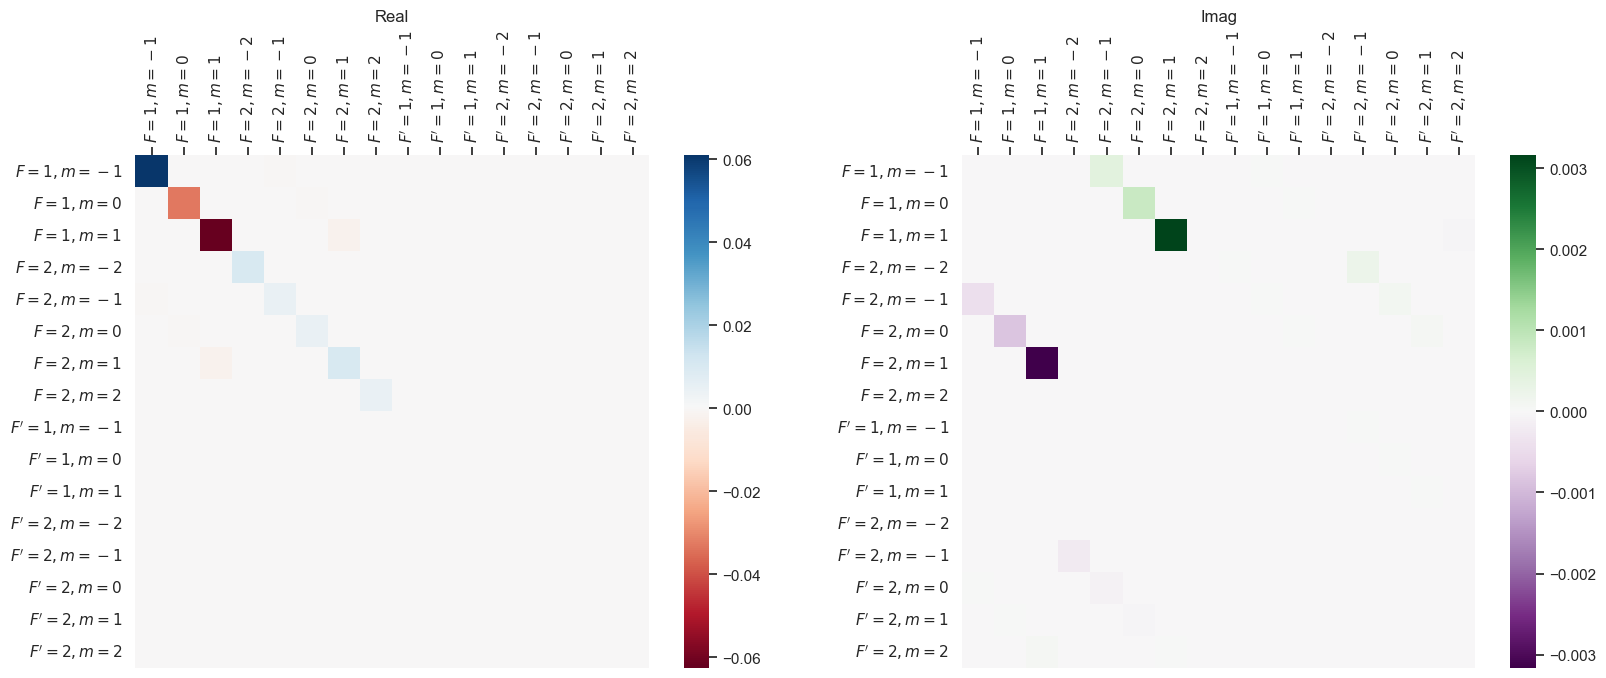

In [19]:
maplot(res_q.states[-1] - res_r.states[-1])

(<Figure size 1680x672 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

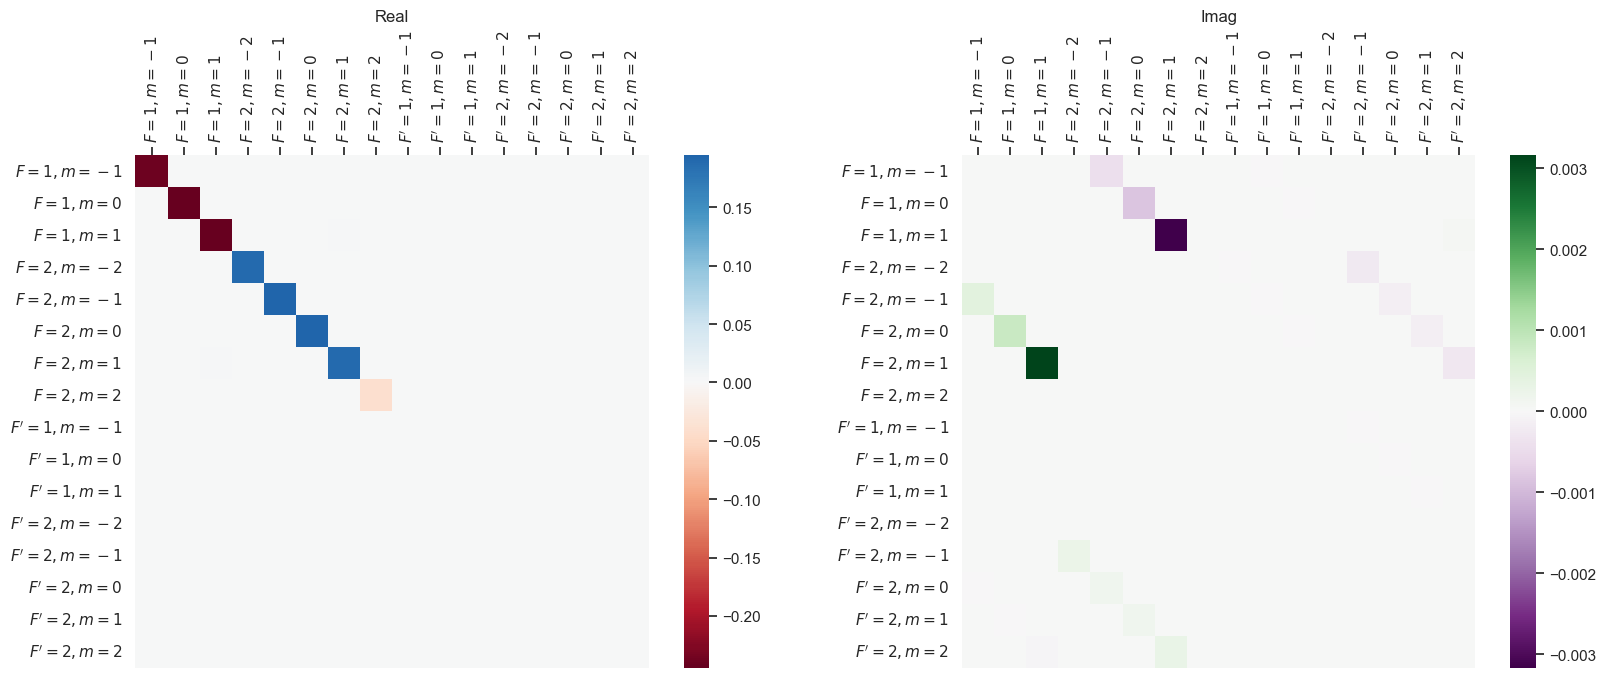

In [20]:
maplot(res_g.states[-1] - res_q.states[-1])

(<Figure size 1680x672 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

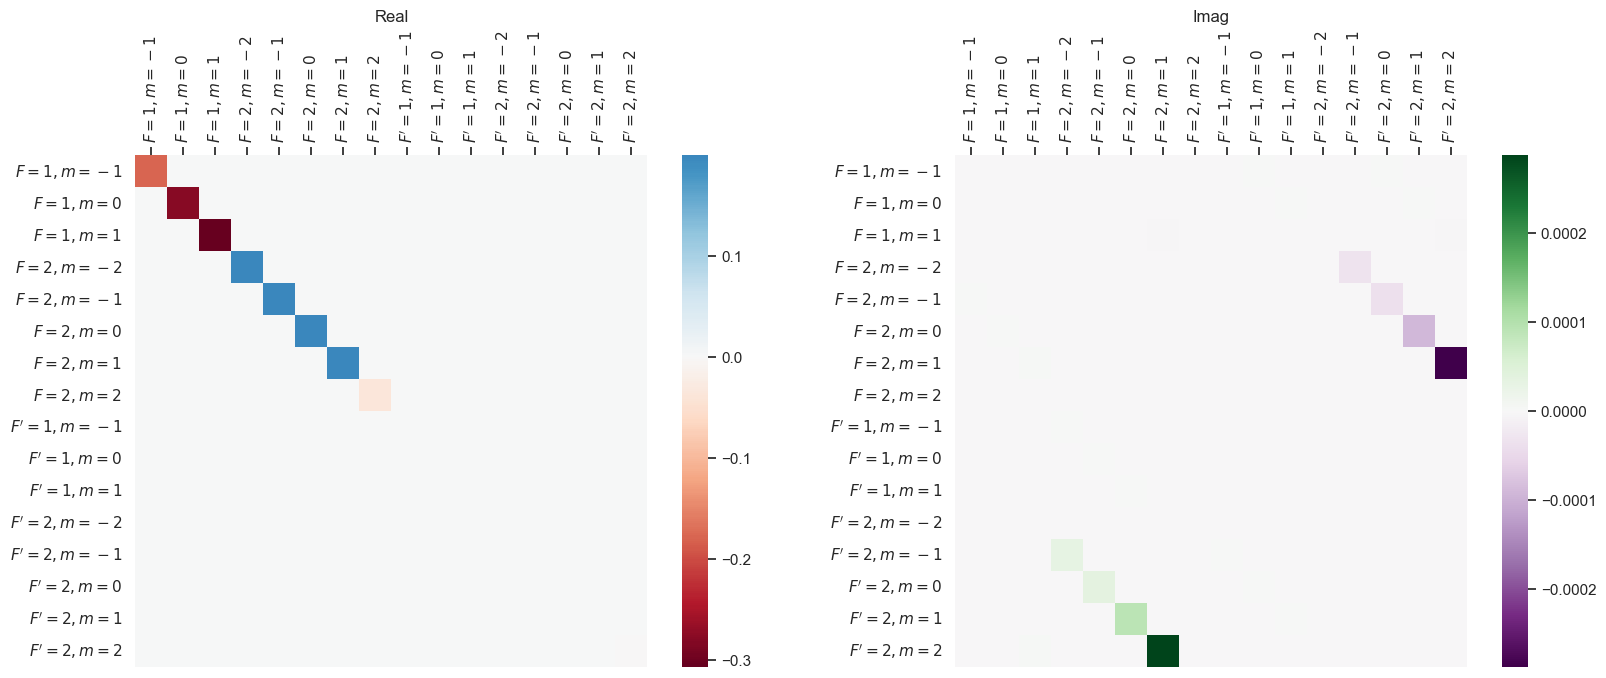

In [21]:
maplot(res_g.states[-1] - res_r.states[-1])

(<Figure size 864x432 with 10 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:xlabel='Time (s)'>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

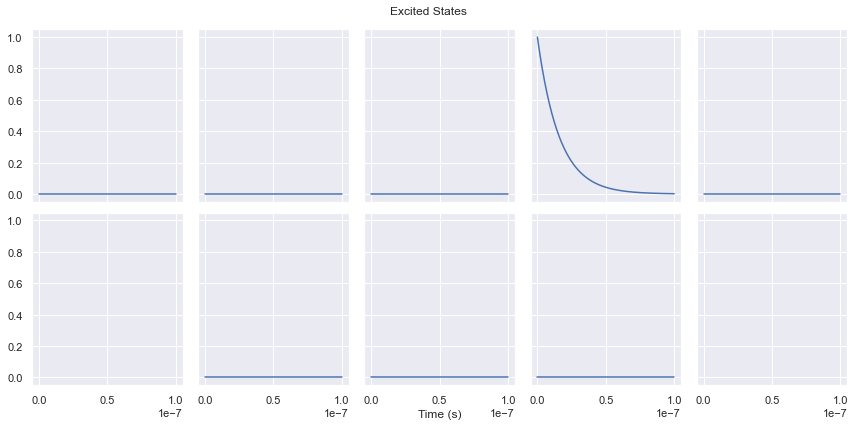

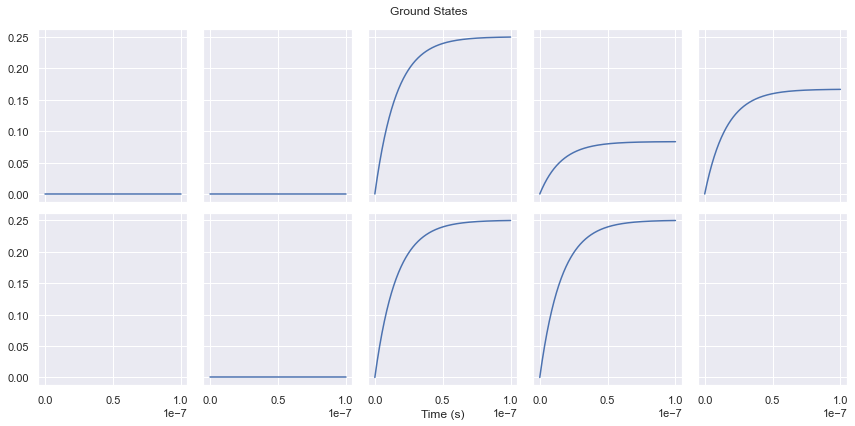

In [22]:
c_ops_exc = []
sts = f_ground_states_uncoupled()
for sigma_k in jmat(1/2):
    c = tensor(identity(4), sigma_k).transform(sts[1])
    c.dims = [[8], [8]]
    tmp = np.zeros(shape=(16,16), dtype=np.cdouble)
    tmp[:8,8:] = c
    c_ops_exc.append((8.4e7)**(1/2)*Qobj(tmp))

L = liouvillian(
    None,
    c_ops=c_ops_exc
)
res_spine = mesolve(
    L,
    rho0=get_ket_Fe_D1(2, 1).proj(),
    tlist=np.linspace(0, 1e-7, 400),
    options=Options(nsteps=5000),
)
plot_excited_states_time(res_spine)
plot_ground_states_time(res_spine)

(<Figure size 864x432 with 10 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:xlabel='Time (s)'>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

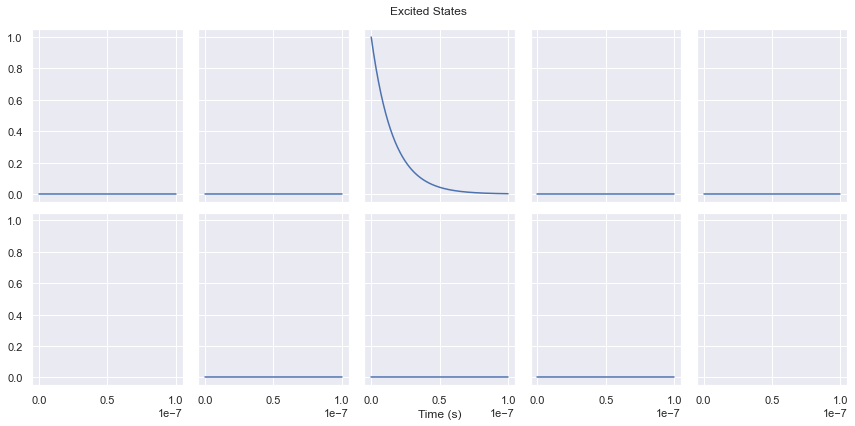

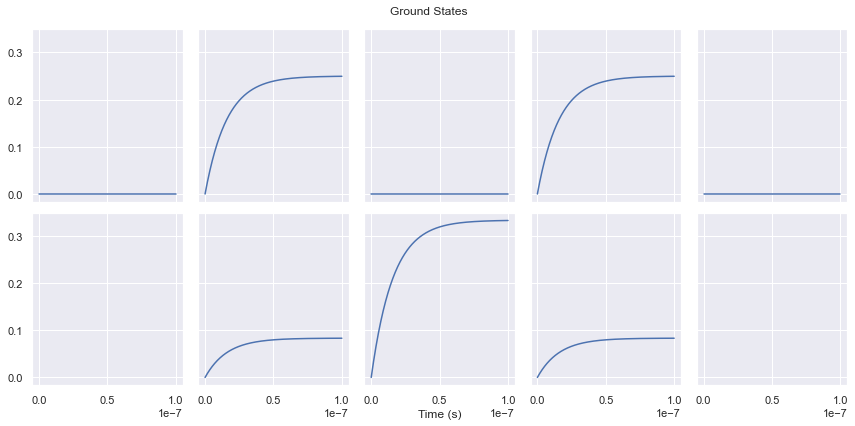

In [23]:
c_ops_exc = []
sts = f_ground_states_uncoupled()
for sigma_k in jmat(1/2):
    c = tensor(identity(4), sigma_k).transform(sts[1])
    c.dims = [[8], [8]]
    tmp = np.zeros(shape=(16,16), dtype=np.cdouble)
    tmp[:8,8:] = c
    c_ops_exc.append((8.4e7)**(1/2)*Qobj(tmp))

L = liouvillian(
    None,
    c_ops=c_ops_exc
)
res_spine = mesolve(
    L,
    rho0=get_ket_Fe_D1(2, 0).proj(),
    tlist=np.linspace(0, 1e-7, 400),
    options=Options(nsteps=5000),
)
plot_excited_states_time(res_spine)
plot_ground_states_time(res_spine)

(<Figure size 1680x672 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

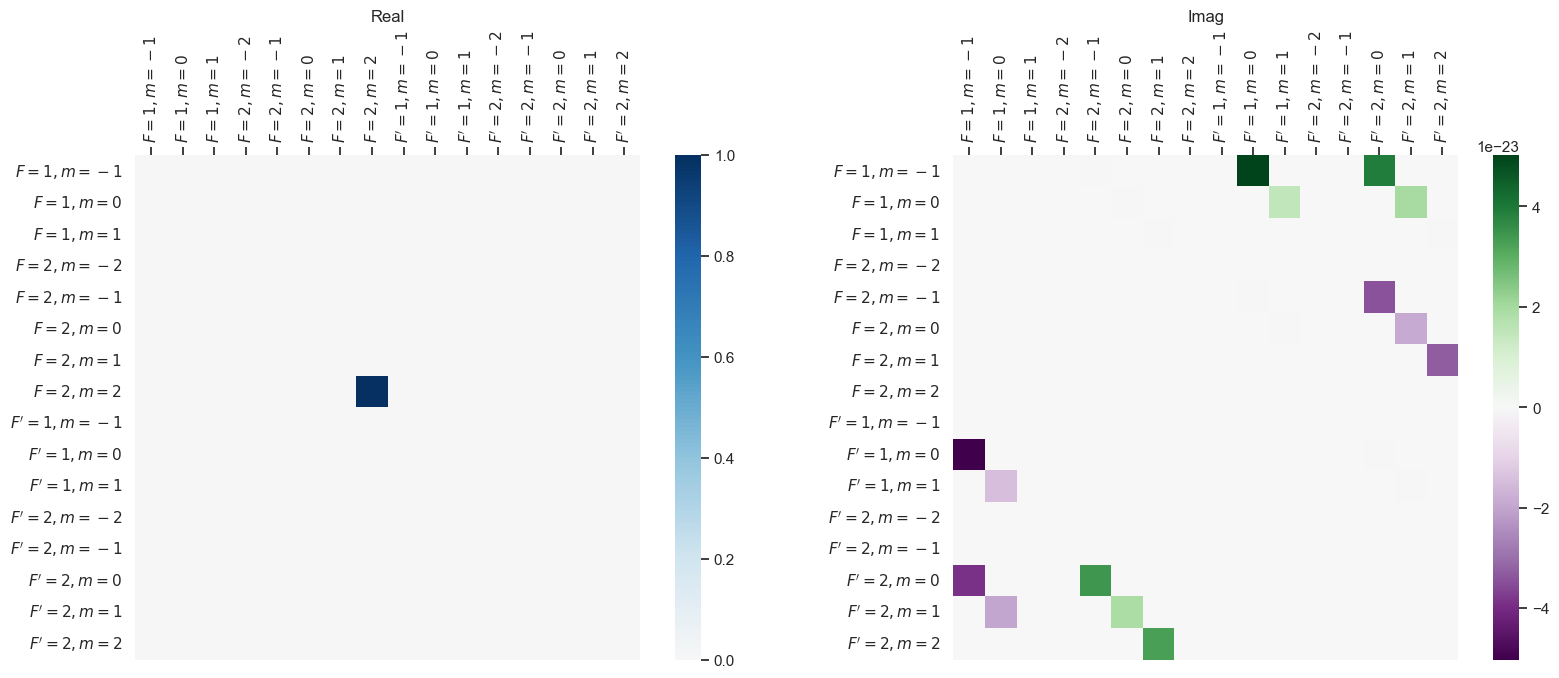

In [24]:
c_ops_exc = []
sts = f_ground_states_uncoupled()
for sigma_k in jmat(1/2):
    c = tensor(identity(4), sigma_k).transform(sts[1])
    c.dims = [[8], [8]]
    tmp = np.zeros(shape=(16,16), dtype=np.cdouble)
    tmp[:8,8:] = c
    c_ops_exc.append((8.4e7)**(1/2)*Qobj(tmp))

L = liouvillian(
    laser_sigma_plus_F2_FP2_D1(OFF_RESONANT_SATURATION_INTENSITY_D1_PI_POL),
    c_ops=c_ops_exc+natural_decay_ops_D1()
)
rho_ss = steadystate(L)
maplot(rho_ss)

(<Figure size 864x432 with 10 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:xlabel='Time (s)'>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

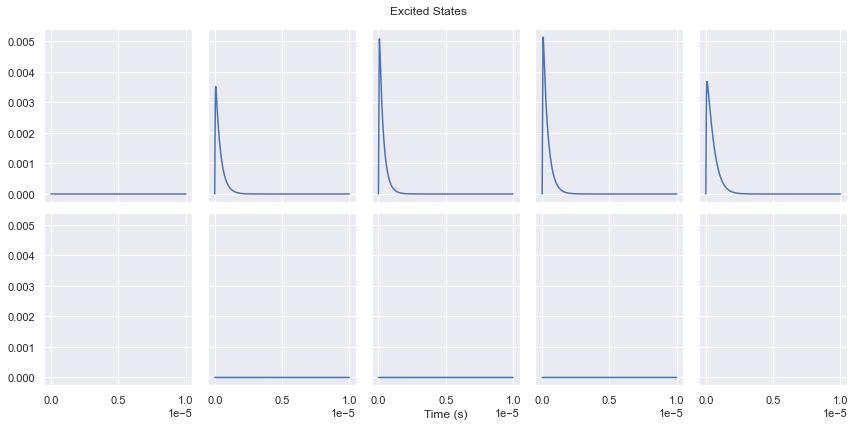

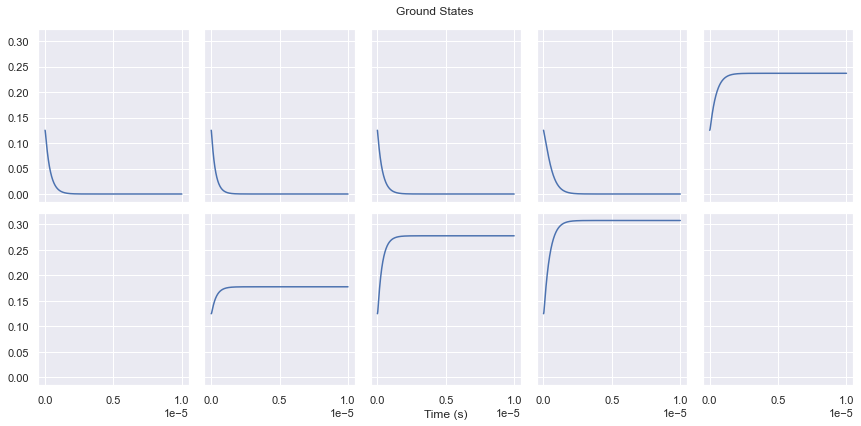

In [25]:
res_spine = mesolve(
    L,
    rho0=get_equally_ground_state_D1(),
    tlist=np.linspace(0, 1e-5, 1000),
    options=Options(nsteps=20000),
)
plot_excited_states_time(res_spine)
plot_ground_states_time(res_spine)

In [26]:
c_ops_exc = []
sts = f_ground_states_uncoupled()
for sigma_k in jmat(1/2):
    c = tensor(identity(4), sigma_k).transform(sts[1])
    c.dims = [[8], [8]]
    tmp = np.zeros(shape=(16,16), dtype=np.cdouble)
    tmp[:8,8:] = c
    c_ops_exc.append((8.4e7)**(1/2)*Qobj(tmp))


(<Figure size 1680x672 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

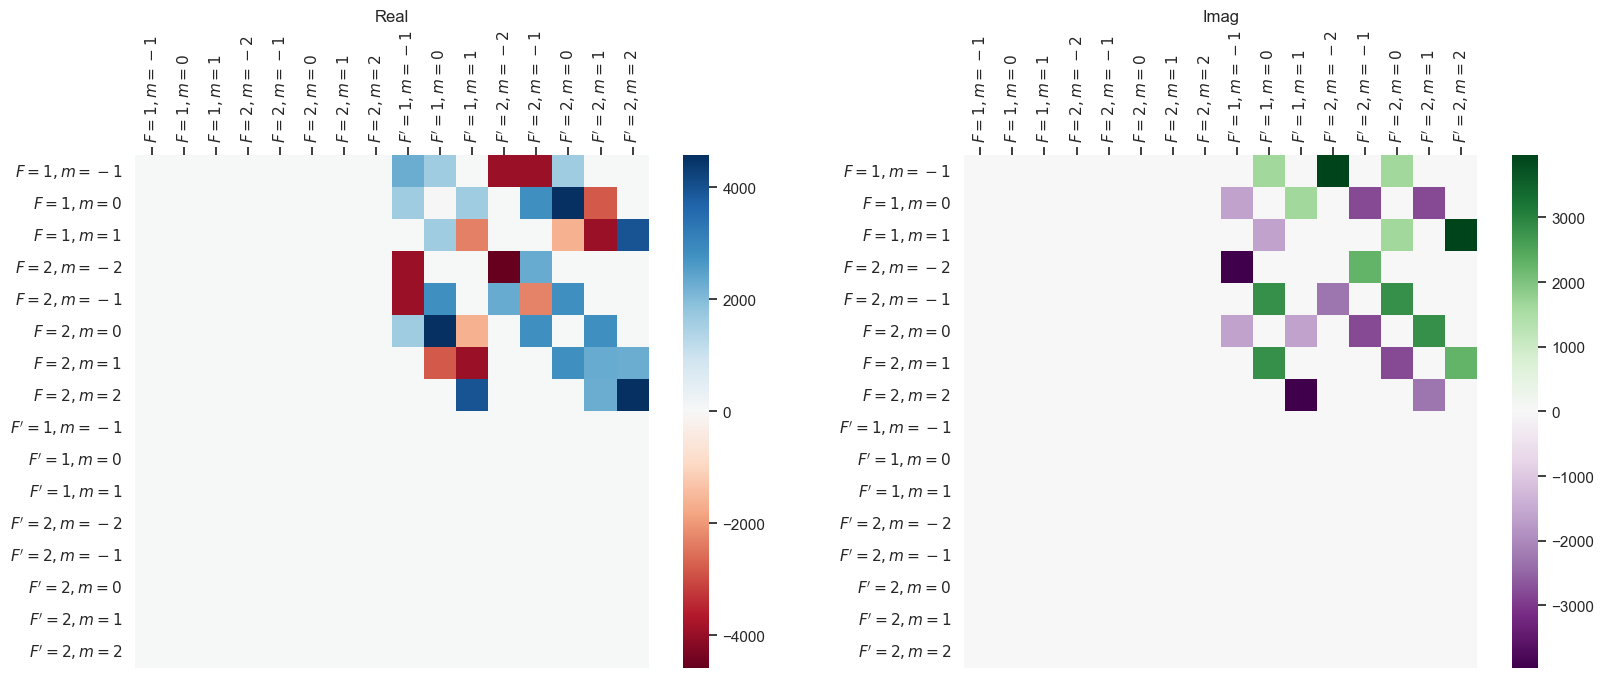

In [27]:
maplot(sum(c_ops_exc))

(<Figure size 1680x672 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

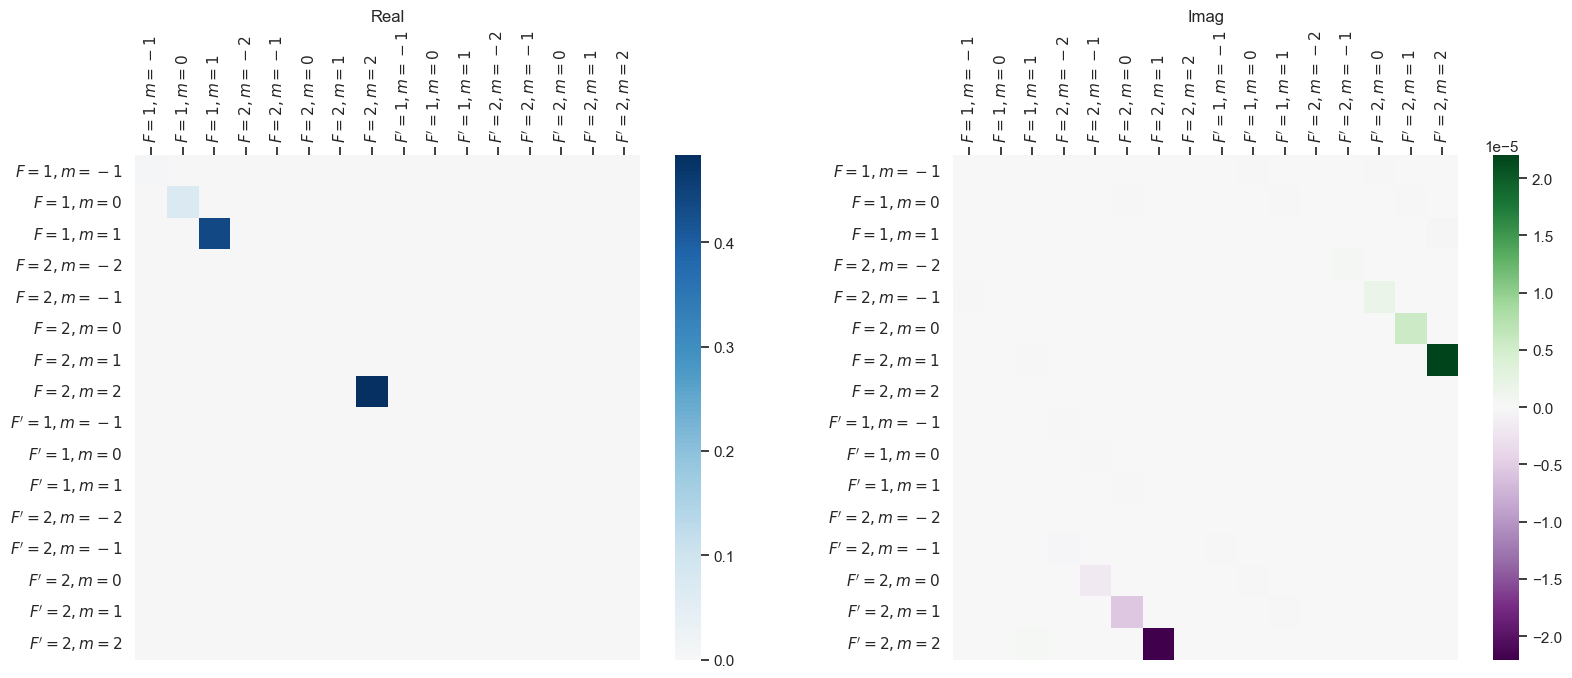

In [28]:

L = liouvillian(
    laser_sigma_plus_F2_FP2_D1(OFF_RESONANT_SATURATION_INTENSITY_D1_PI_POL),
    c_ops=c_ops_exc+natural_decay_ops_D1()+c_ops_ground
)
rho_ss = steadystate(L)
maplot(rho_ss)

(<Figure size 864x432 with 10 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:xlabel='Time (s)'>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

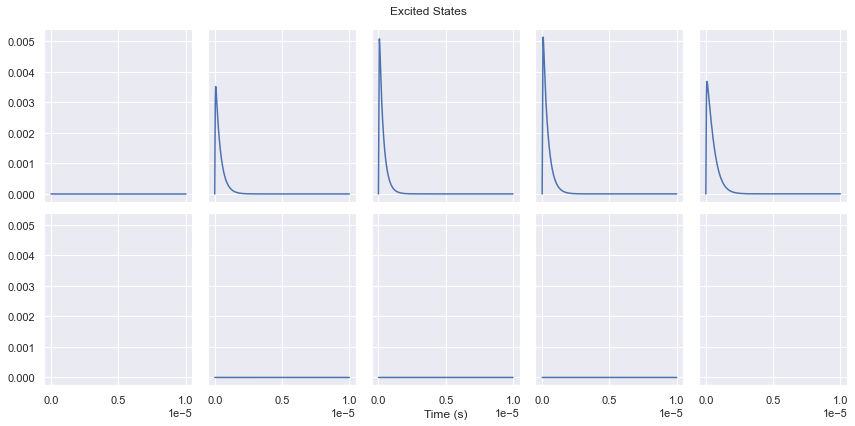

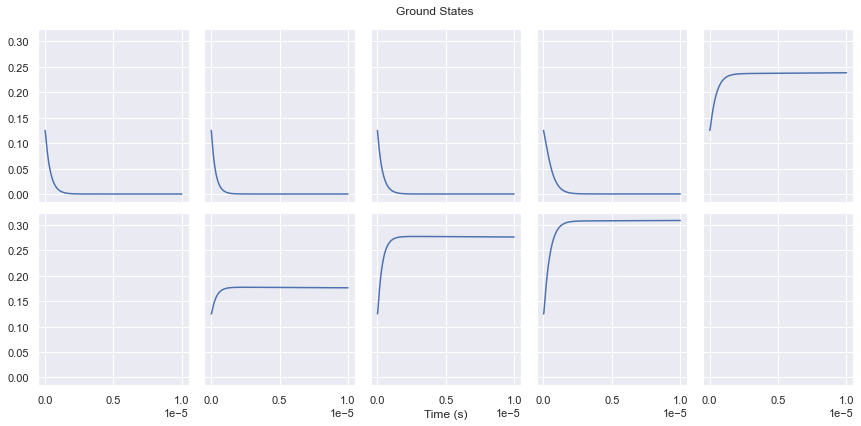

In [29]:
res_spine = mesolve(
    L,
    rho0=get_equally_ground_state_D1(),
    tlist=np.linspace(0, 1e-5, 1000),
    options=Options(nsteps=20000),
)
plot_excited_states_time(res_spine)
plot_ground_states_time(res_spine)

# Dephasing

In [47]:
res_dephasing = mesolve(0*hamil, c_ops=dephasing_excited_states("D1"), tlist=np.linspace(0, 1e-6, 1000), rho0=get_ket_Fe_D1(2, 2)*get_ket_Fe_D1(1, 1).dag())


c:\Users\mv\anaconda3\envs\masterarbeitpy39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


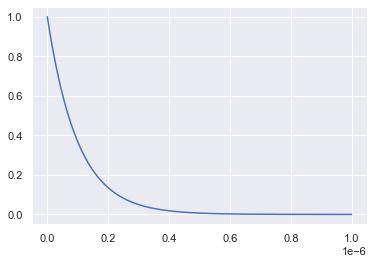

In [48]:
y = [state.matrix_element(get_ket_Fe_D1(2, 2).dag(), get_ket_Fe_D1(1, 1)) for state in res_dephasing.states]
plt.plot(res_dephasing.times, y)

(<Figure size 864x432 with 10 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:xlabel='Time (s)'>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

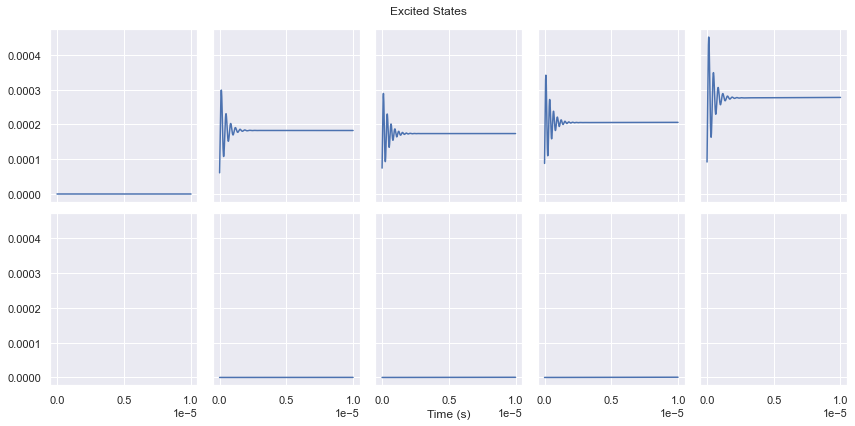

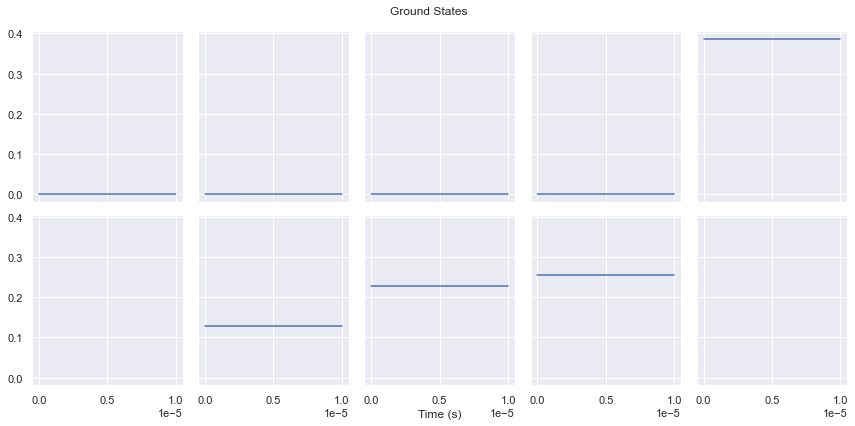

In [55]:
rho0=steadystate(hamil, c_op_list=natural_decay_ops_D1()+F1_to_F2_ground_state_decay(line="D1")+F2_to_F1_ground_state_decay(line="D1"))
res_dephasing = mesolve(hamil, c_ops=dephasing_excited_states("D1"), tlist=np.linspace(0, 1e-5, 1000), rho0=rho0)
plot_excited_states_time(res_dephasing)
plot_ground_states_time(res_dephasing)


(<Figure size 1680x672 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

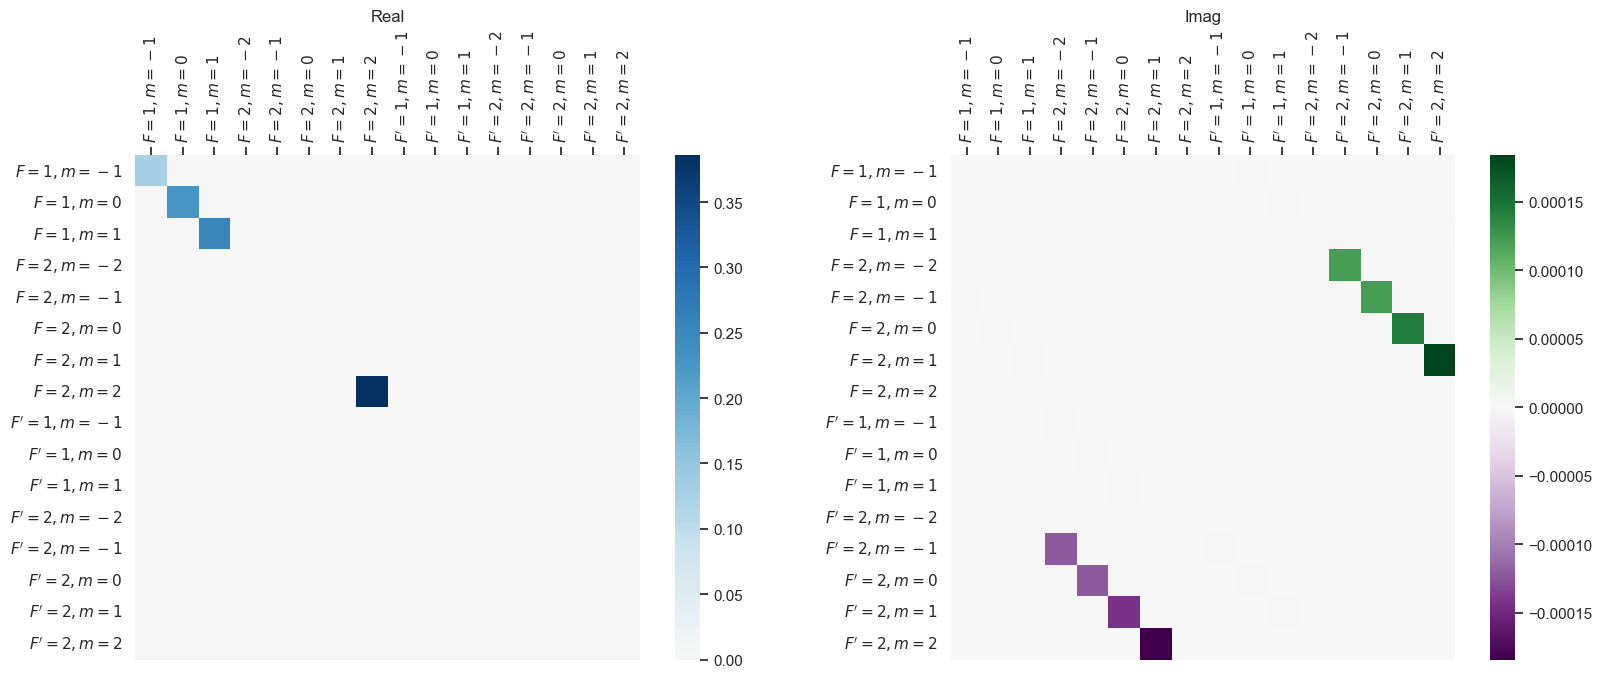

In [56]:
maplot(rho0)

(<Figure size 1680x672 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

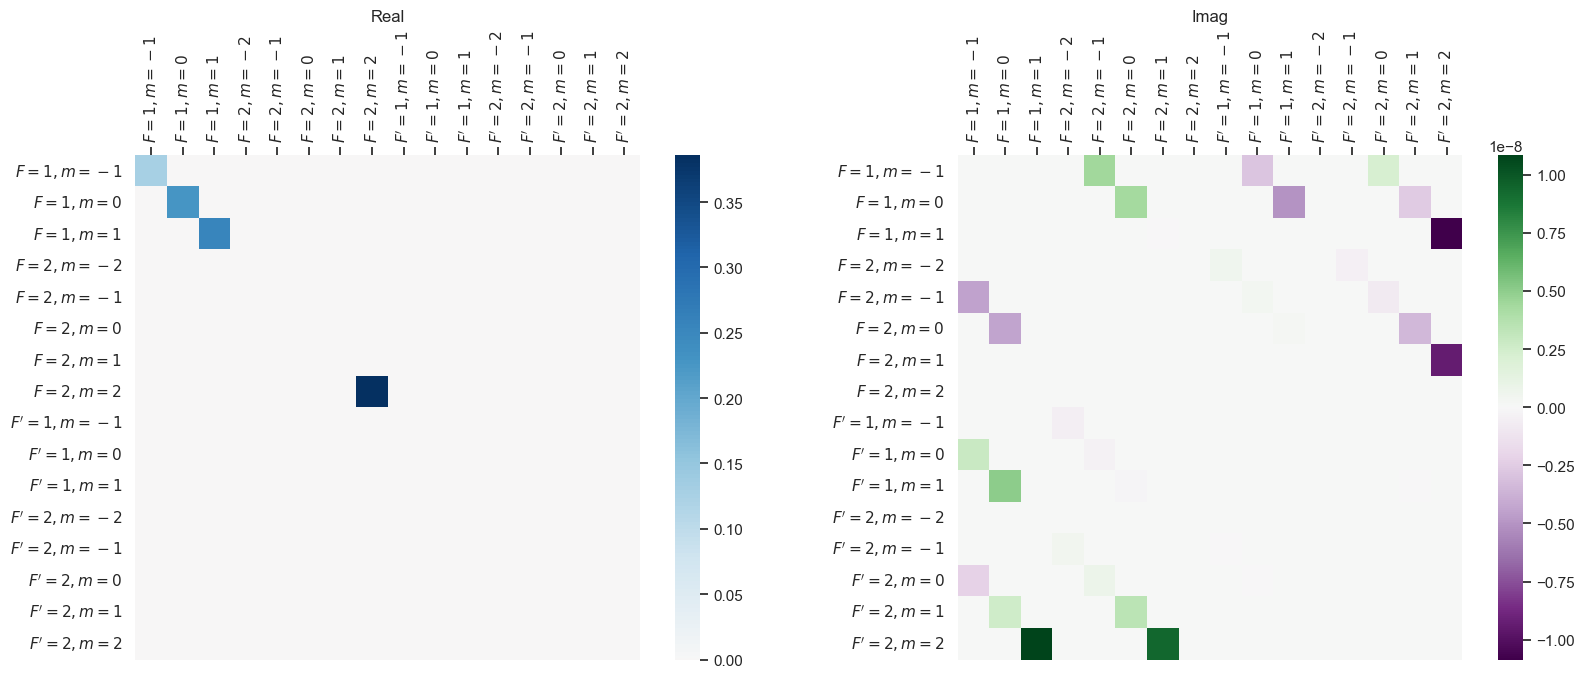

In [57]:
maplot(res_dephasing.states[-1])

# everything added

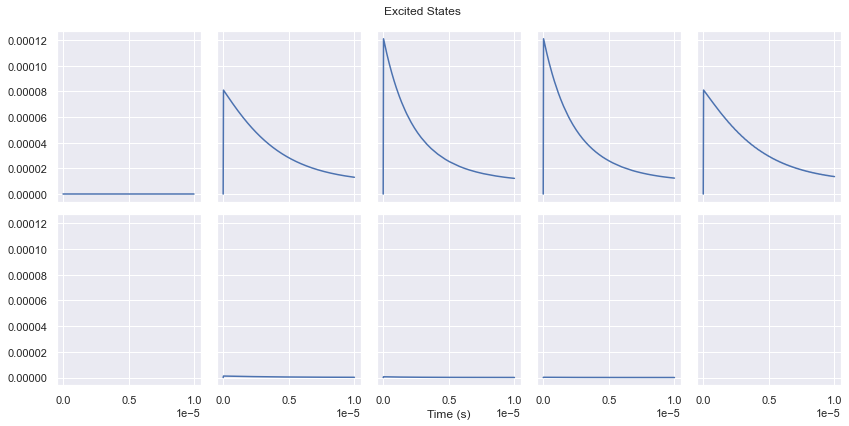

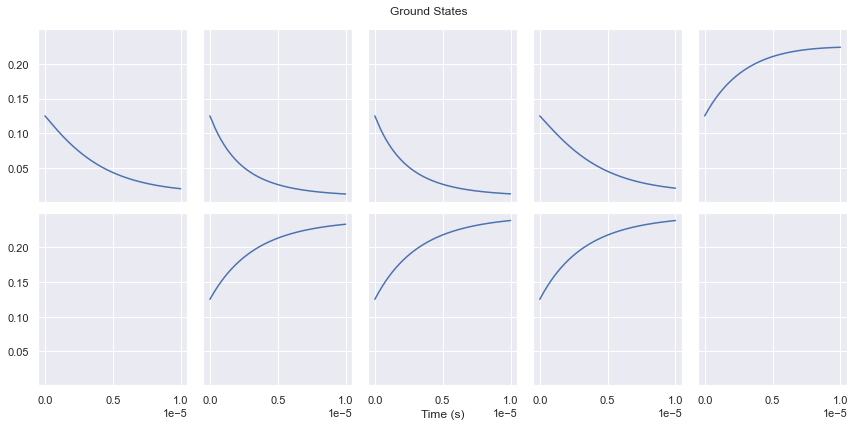

In [30]:
# %%
L = liouvillian(
    hamil,
    c_ops=natural_decay_ops_D1() + F1_to_F2_ground_state_decay("D1") +
    F2_to_F1_ground_state_decay("D1")+intra_F_ground_decay("D1")+quenching_ops("D1")
    # dephasing_excited_states("D1"),
)
res_all = mesolve(
    L,
    rho0=get_equally_ground_state_D1(),
    tlist=np.linspace(0, 1e-5, 400),
    options=Options(nsteps=7000),
)
#%%
fige, axe = plot_excited_states_time(res_all)
figg, axg = plot_ground_states_time(res_all)

In [31]:
hamil = laser_sigma_plus_F2_FP2_D1(get_pump_intensity(1e-3))

L = liouvillian(
    hamil,
    c_ops=natural_decay_ops_D1() #F1_to_F2_ground_state_decay("D1")+F2_to_F1_ground_state_decay("D1")+intra_F_ground_decay("D1")+quenching_ops("D1"),
)
res_rad = mesolve(
    L,
    rho0=get_equally_ground_state_D1(),
    tlist=np.linspace(0, 1e-5, 400),
    options=Options(nsteps=7000),
)
fige, axse = plot_excited_states_time(res_rad, axs=axe)
figg, axsg = plot_ground_states_time(res_rad, axs=axg)

<Figure size 432x288 with 0 Axes>

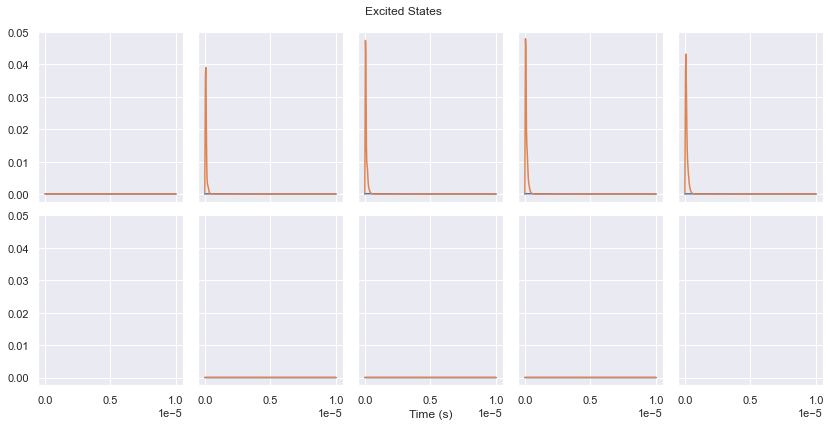

In [32]:
fige

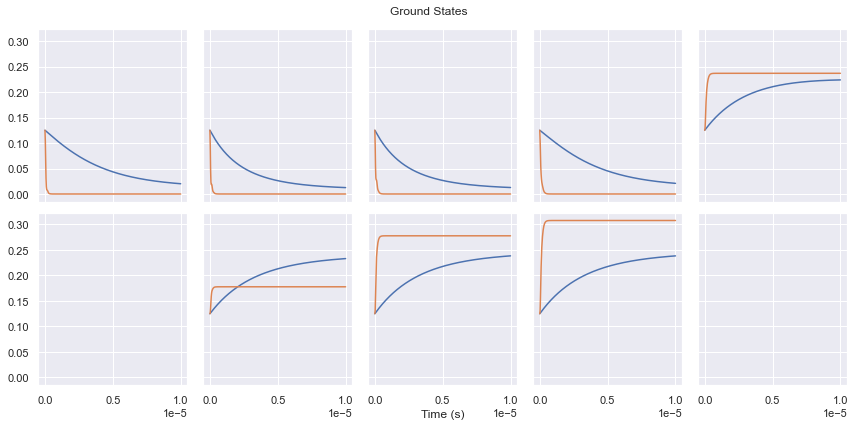

In [33]:
figg